캐글에서 [야생동물 충돌로 인한 비행기 사고](https://www.kaggle.com/faa/wildlife-strikes) 데이터셋을 실습용으로 다듬은 데이터.

In [1]:
%config InlineBackend.figure_format = 'retina'
!pip install matplotlib pandas plotnine statsmodels --upgrade > /dev/null

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from plotnine import options as opt

src = pd.read_csv(
    "https://s3.ap-northeast-2.amazonaws.com/data10902/messy/aircraft-strikes.csv",
    dtype={
        "record_id": np.int32,
        "year": np.int32,
        "month": np.int32,
        "day": np.int32,
        "operator_id": str,
        "operator": str,
        "aircraft": str,
        "species": str,
        "aircraft_damage": bool,
        "height": np.float32,
        "speed": np.float32,
    }
)

실수에 대비한 사본 만들기.

In [21]:
df = src.copy()
df

record_id  year  month  day operator_id             operator  \
0          127128  1990      1    1         DAL      DELTA AIR LINES   
1          129779  1990      1    1         HAL         HAWAIIAN AIR   
2          129780  1990      1    2         NaN                  NaN   
3            2258  1990      1    3         MIL             MILITARY   
4            2257  1990      1    3         MIL             MILITARY   
5          129734  1990      1    4         HAL         HAWAIIAN AIR   
6          129735  1990      1    5         NaN                  NaN   
7          129736  1990      1    5         NaN                  NaN   
8          129737  1990      1    6         NaN                  NaN   
9          127848  1990      1    7         EME        METRO EXPRESS   
10         107155  1990      1    8         USA          1US AIRWAYS   
11         129738  1990      1    8         NaN                  NaN   
12         113914  1990      1   11         BUS             BUSINESS   
13           2259  1990      1   11         MIL             MILITARY   
14         102248  1990      1   11         SWA   SOUTHWEST AIRLINES   
15         129739  1990      1   12         HAL         HAWAIIAN AIR   
16           2260  1990      1   13         MIL             MILITARY   
17           1604  1990      1   15         MIL             MILITARY   
18           1605  1990      1   18         MIL             MILITARY   
19         127472  1990      1   19         NaN                  NaN   
20         129401  1990      1   19         PVT      PRIVATELY OWNED   
21         129740  1990      1   19         NaN                  NaN   
22         129741  1990      1   19         NaN                  NaN   
23         102359  1990      1   19         UPS         UPS AIRLINES   
24         127473  1990      1   20         BUS             BUSINESS   
25         129614  1990      1   21         EAL      EASTERN AIRLINE   
26         129402  1990      1   23         USC       AIRNET EXPRESS   
27           5206  1990      1   23         MIL             MILITARY   
28         129742  1990      1   24         NaN                  NaN   
29         129743  1990      1   25         NaN                  NaN   
...           ...   ...    ...  ...         ...                  ...   
174073     365960  2015      9   30         AAL    AMERICAN AIRLINES   
174074     365907  2015      9   30         UPS         UPS AIRLINES   
174075     365906  2015      9   30         UPS         UPS AIRLINES   
174076     365905  2015      9   30         UPS         UPS AIRLINES   
174077     365904  2015      9   30         UPS         UPS AIRLINES   
174078     365829  2015      9   30         DAL      DELTA AIR LINES   
174079     365830  2015      9   30         DAL      DELTA AIR LINES   
174080     365831  2015      9   30         DAL      DELTA AIR LINES   
174081     365832  2015      9   30         FLG         ENDEAVOR AIR   
174082     365833  2015      9   30         ENY            ENVOY AIR   
174083     365834  2015      9   30         ENY            ENVOY AIR   
174084     365890  2015      9   30         FDX        FEDEX EXPRESS   
174085     366051  2015      9   30         SWA   SOUTHWEST AIRLINES   
174086     366050  2015      9   30         SWA   SOUTHWEST AIRLINES   
174087     366049  2015      9   30         SWA   SOUTHWEST AIRLINES   
174088     366593  2015      9   30         NaN                  NaN   
174089     365891  2015      9   30         FDX        FEDEX EXPRESS   
174090     366047  2015      9   30         JIA         PSA AIRLINES   
174091     366045  2015      9   30         FDX        FEDEX EXPRESS   
174092     366044  2015      9   30         FDX        FEDEX EXPRESS   
174093     366043  2015      9   30         FDX        FEDEX EXPRESS   
174094     366042  2015      9   30         AAL    AMERICAN AIRLINES   
174095     366041  2015      9   30         BUS             BUSINESS   
174096     365835  2015      9   30         ENY 

데이터 설명:

* record_id: 고유 번호
* year, month, day: 사고 발생일
* operator_id: 운영사(항공사?) 식별코드
* operator: 운영사 이름
* aircraft: 비행기 기종
* species: 야생동물종
* aircraft_damage: 항공기 손상 여부
* height: 고도
* speed: 속도

In [3]:
df.tail()

record_id  year  month  day operator_id            operator  \
174098     365837  2015      9   30         FDX       FEDEX EXPRESS   
174099     366091  2015      9   30         SWA  SOUTHWEST AIRLINES   
174100     365902  2015      9   30         SWA  SOUTHWEST AIRLINES   
174101     365903  2015      9   30         BUS            BUSINESS   
174102     366046  2015      9   30         QXE         HORIZON AIR   

           aircraft             species  aircraft_damage  height  speed  
174098     DC-10-10  UNKNOWN SMALL BIRD            False  2000.0  210.0  
174099    B-737-700  UNKNOWN SMALL BIRD            False     NaN    NaN  
174100    B-737-700  UNKNOWN SMALL BIRD            False  5000.0  250.0  
174101  CITATIONJET      TURKEY VULTURE             True  3000.0  200.0  
174102  DHC8 DASH 8       HERMIT THRUSH            False  6000.0    NaN

## 데이터 살펴보기

일단 연도에 따라 사고 발생 건수의 추이를 살펴보자. 사고가 늘고 있을까, 줄고 있을까? 전체 운행 건수와 비교해보면 더 의미가 있겠지만 일단 이거라도 보자.

In [84]:
accident_counts = df["year"].value_counts()
accident_counts = pd.DataFrame(accident_counts).sort_index()
accident_counts.columns = ['counts']
accident_counts.head()

counts
1990    2099
1991    2672
1992    2816
1993    2849
1994    2938

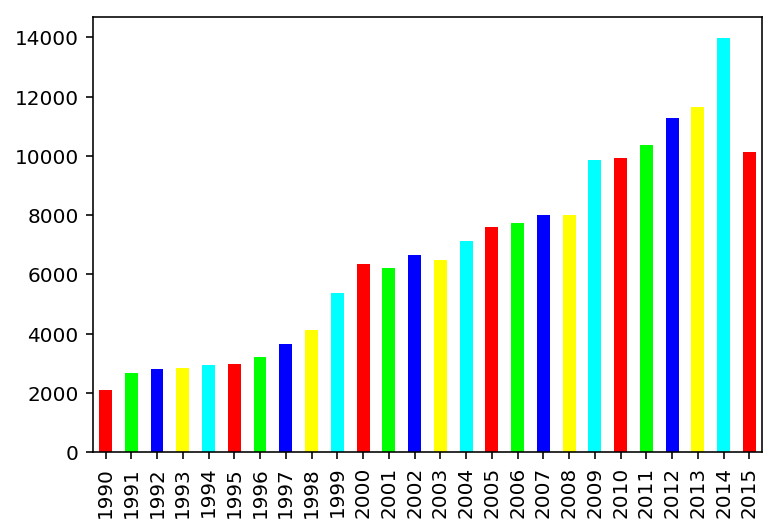

In [85]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
df["year"].value_counts().sort_index().plot.bar(color=color);

10년 단위로 색상을 다르게 표현해보려고 합니다.

In [86]:
# 10년 단위로 데이터를 잘라줍니다.
decade90 = accident_counts[:10]
decade00 = accident_counts[10:20]
decade10 = accident_counts[20:]

#잘 들어갔는지 한번 확인.
decade90

counts
1990    2099
1991    2672
1992    2816
1993    2849
1994    2938
1995    2989
1996    3215
1997    3651
1998    4131
1999    5385

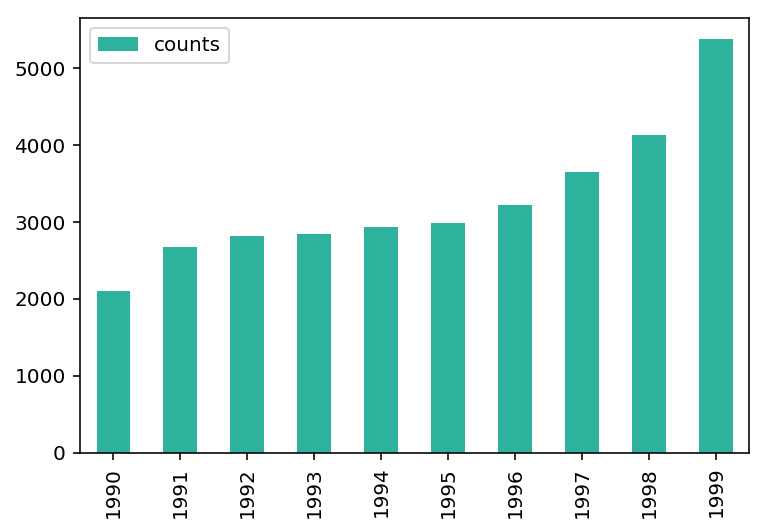

In [87]:
# 90년대 데이터의 그래프
decade90.plot.bar(color = '#2EB29D')

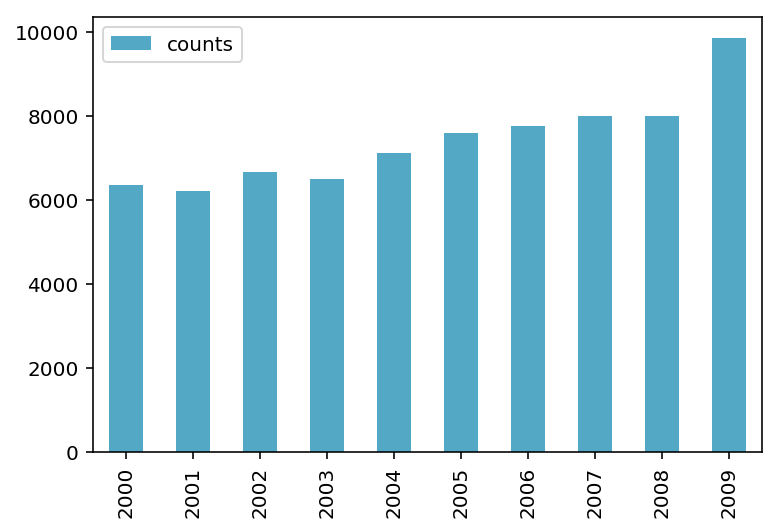

In [88]:
# 2000년대 데이터의 그래프
decade00.plot.bar(color = '#53A8C5')

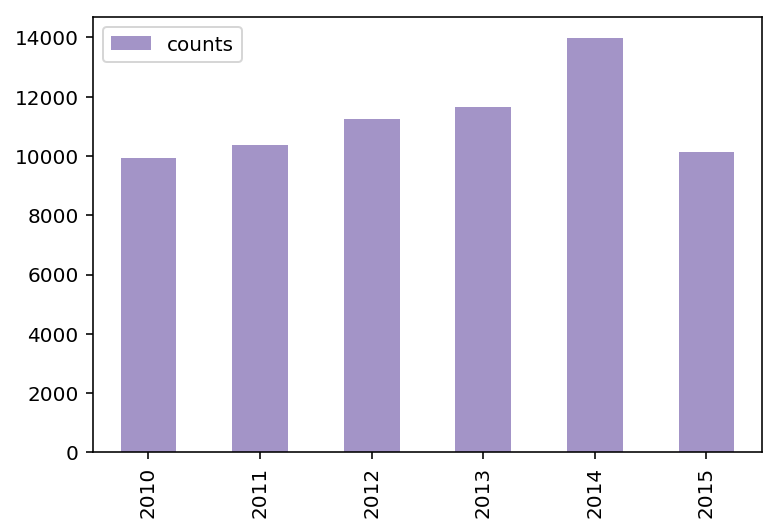

In [89]:
# 2010년대 데이터의 그래프


In [90]:
accident_counts = pd.merge(decade90, decade00, decade10)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# 앞과 뒤 데이터 3개를 비교해서 500건 이상 변화가 있는 경우 강조 색 사용

gap_500_color = ['#D87B9C','#A8A3D9','#49CCDF','#60E5A9','#D1EC6A']
accident_counts.sort_index().plor.bar(color = gap_500_color)


연중 사고가 가장 빈번한 달은?

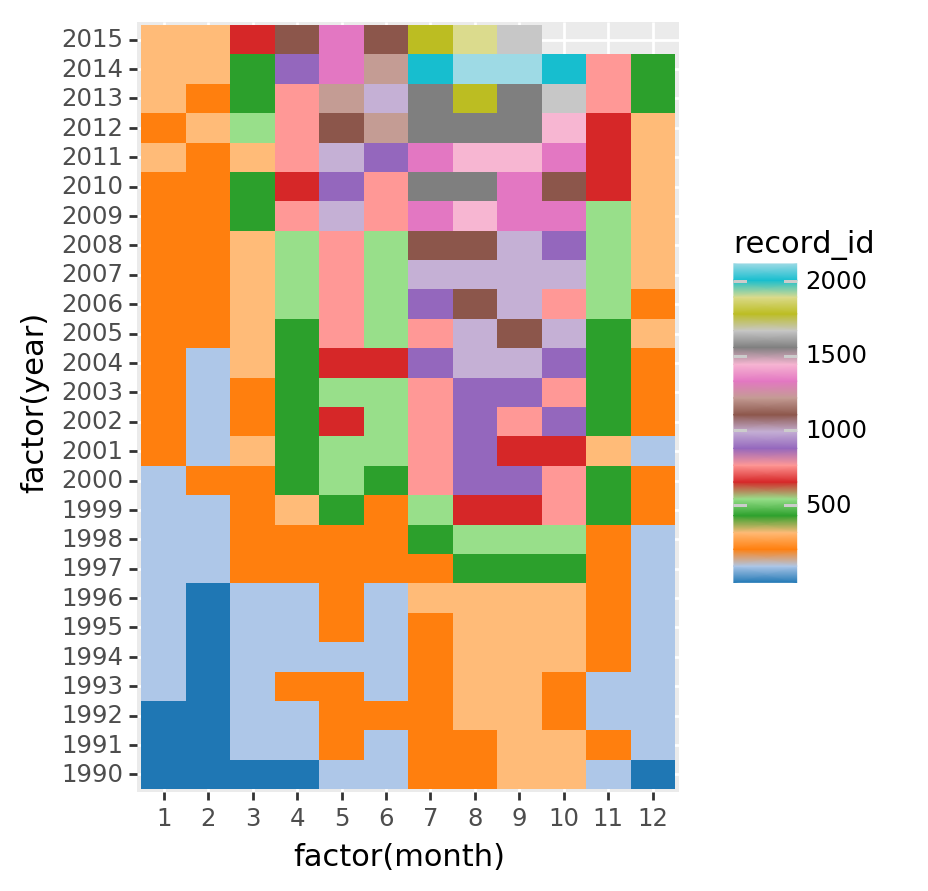

<ggplot: (-9223372036573890721)>

In [5]:
year_month = df.groupby(by=["year", "month"])["record_id"] \
  .aggregate(lambda x: x.value_counts().count()) \
  .reset_index()

(ggplot(year_month, aes('factor(month)', 'factor(year)', fill='record_id'))
 + geom_tile(aes(width=1, height=1))
 + theme(figure_size=(3.5, 5))
 + scale_fill_cmap("tab20")
)

대충 시간의 흐름에 따른 패턴에 대해서 살펴보고 났더니 그 다음으로는 인명 피해가 얼마나 클지가 궁금해진다. 기체 손상이 없었다면(aircraft_damage) 아마도 인명 피해가 없었을 것이라고 생각해도 좋지 않을까?


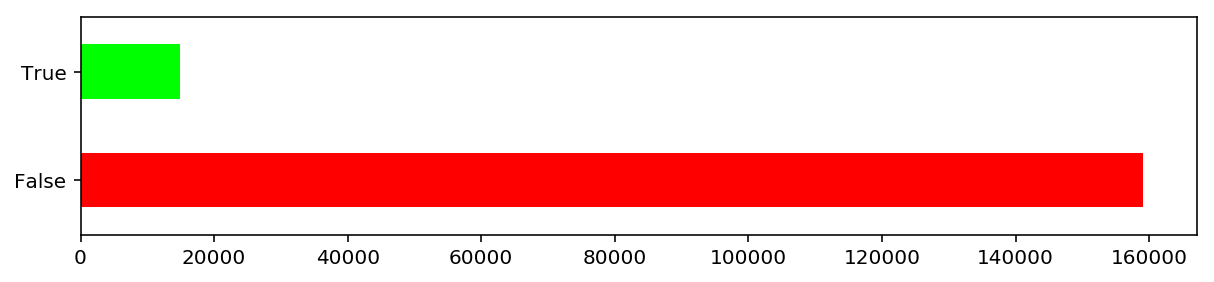

In [6]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
df["aircraft_damage"].value_counts().plot.barh(figsize=(10, 2), color=color);

## 어떤 동물들이 사고를 많이 당할까?

다행스럽게도 기체손상이 없는 경우가 열 배나 많다. 이제는 동물들이 걱정되기 시작했다.

가장 빈번하게 사고를 일으키는 야생동물종은?

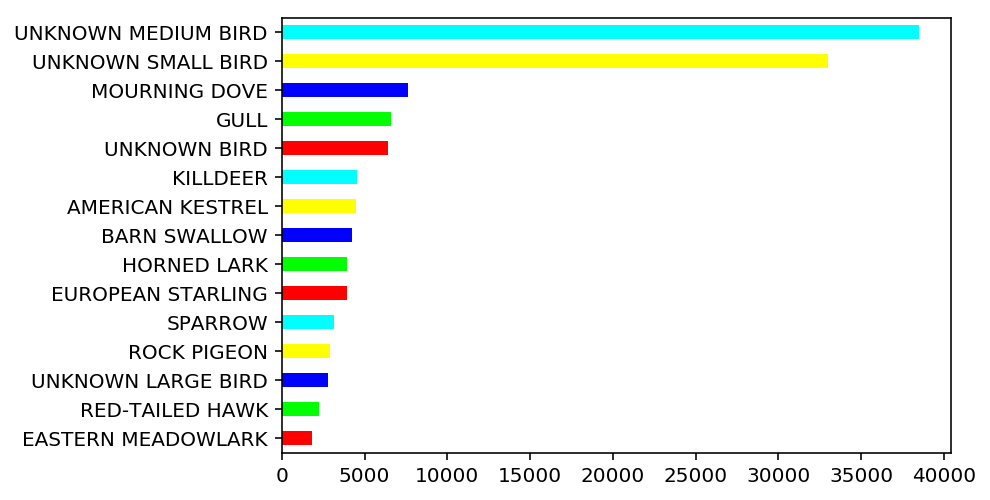

In [7]:
top_species = df["species"].value_counts().sort_values()

color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
top_species.tail(15).plot.barh(color=color);

이륙 전(height == 0)에 발생한 사고만 보면?

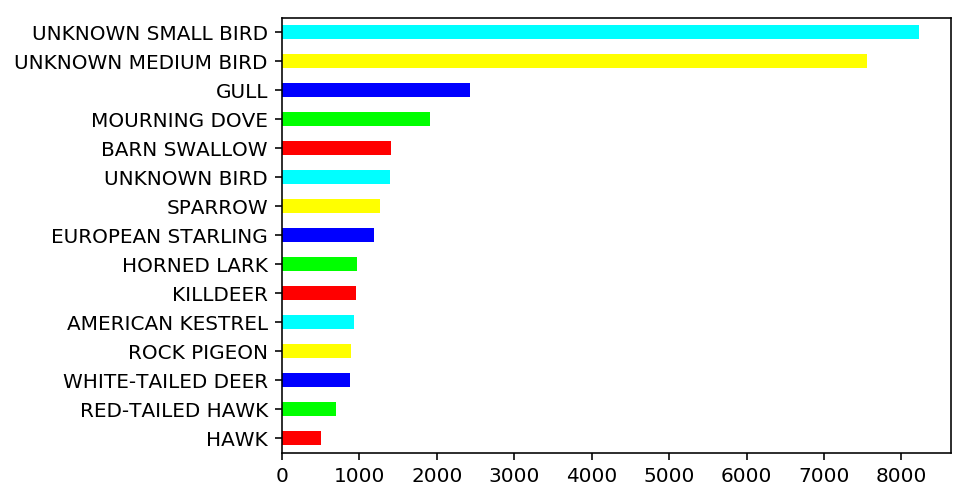

In [8]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20
df.loc[df.height == 0, "species"].value_counts().sort_values().tail(15).plot.barh(color=color);

사고 당시 평균 고도를 종별로 나눠서 살펴보면 어떤 결과가 나올까?

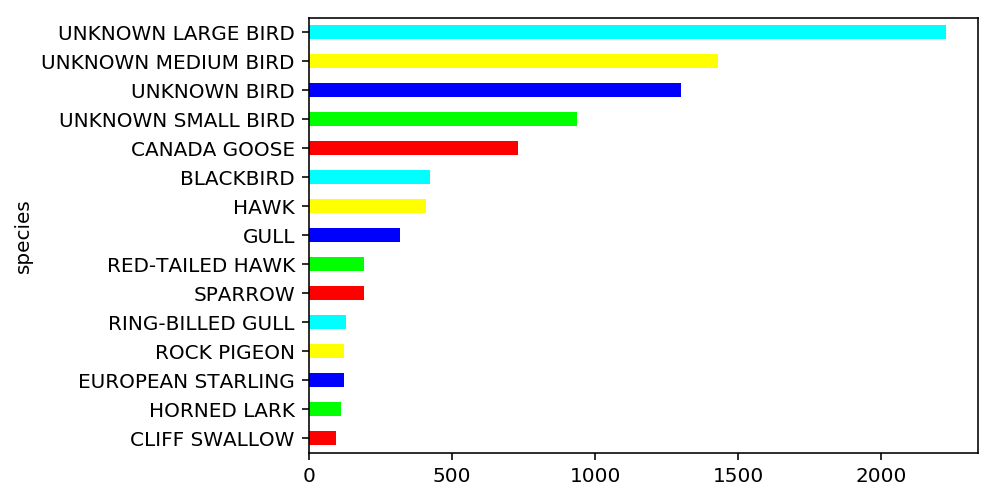

In [9]:
color=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"] * 20

df.loc[df["species"].isin(top_species.tail(20).index)] \
  .groupby(by="species")["height"].mean() \
  .sort_values().tail(15).plot.barh(color=color);

고도, 속도, 기체고장률 사이의 상관 관계는?

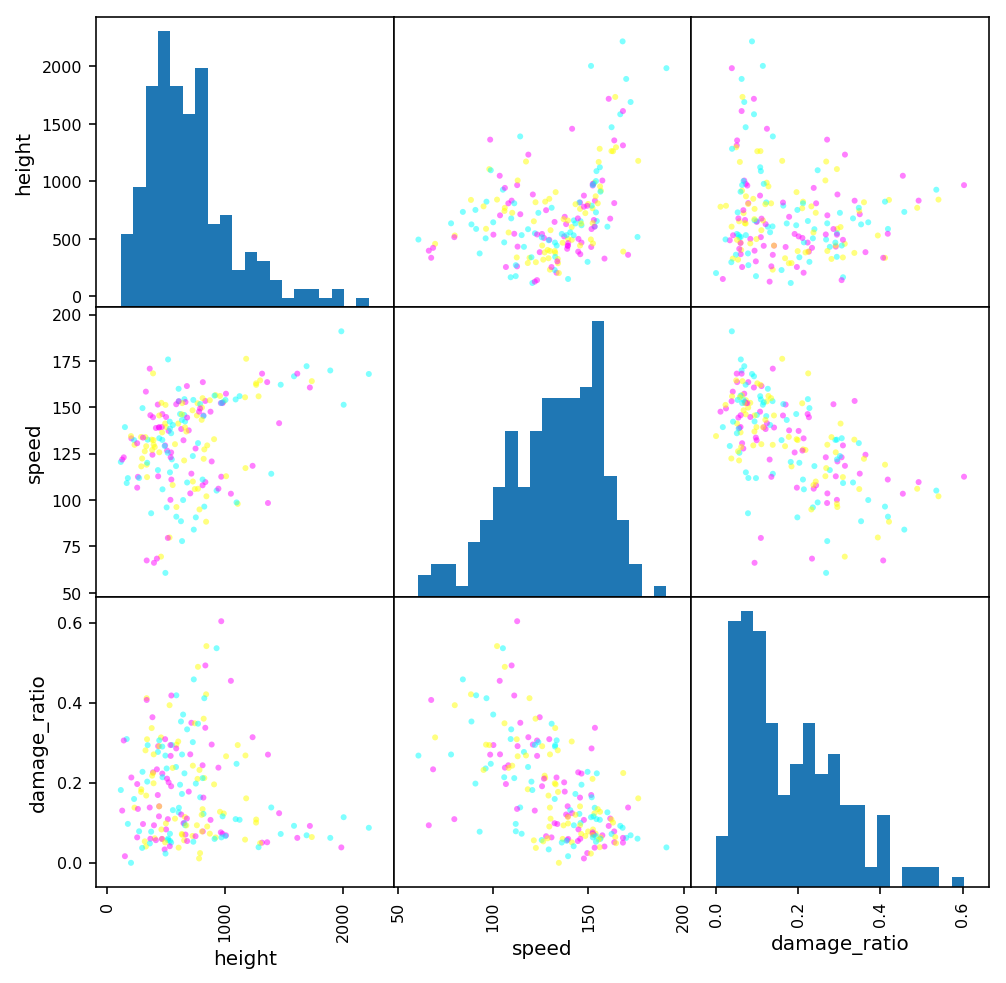

In [10]:
top_aircrafts = df["aircraft"].value_counts().sort_values()

# 기종별 사고 빈도, 평균 고도, 평균 속도, 손상률
damages = df.groupby(by="aircraft")[["record_id", "aircraft_damage", "height", "speed"]].agg({
    "record_id": lambda x: len(x.unique()),
    "aircraft_damage": np.sum,
    "height": np.mean,
    "speed": np.mean,
})
damages["damage_ratio"] = damages["aircraft_damage"] / damages["record_id"]

# 사고 빈도가 50회 이상인 기종에 대한 scatter plot matrix
color=["#FF00FF", "#FFFF00", "#00FFFF"] * 20
pd.plotting.scatter_matrix(
    damages.loc[damages["record_id"] > 50, ["height", "speed", "damage_ratio"]].sort_values("damage_ratio", ascending=False),
    figsize=(8, 8),
    range_padding=0.2,
    hist_kwds={"bins": 20},
    color=color
);